In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Imports the $\Delta \chi^2$  in the range $[-2,0]$ for $C_9$ and in the range $[-1,1]$ for $C_{10}$

In [2]:
No_power_delta = np.load("No_power_delta_chi.npy") #Without power corrections
Power_delta = np.load("Power_delta_chi.npy") #With power corrections

In [3]:
C9s = np.linspace(-2,0,201)
C10s = np.linspace(-1,1,201)

In [4]:
#Find the errors for the joint fit for C9 and C10

limit = 2.3 #1 sigma upper limit

low_C9 = max(C9s)
up_C9 = min(C9s)

low_C10 = max(C10s)
up_C10 = min(C10s)

for i in range(len(C9s)):
    for j in range(len(C10s)):#Scans any posible combination of C9 and 10
        
        if (No_power_delta[i,j]<=limit and Power_delta[i,j]<=limit):#If both chi^2 are within the 1 sigma region it actualises the boundaries
            low_C9 = min(C9s[i], low_C9)
            up_C9 = max(C9s[i], up_C9)
            
            low_C10 = min(C10s[j], low_C10)
            up_C10 = max(C10s[j], up_C10)

print(round(low_C9,2),round(up_C9,2))
print(round(low_C10,2),round(up_C10,2))

-1.54 -0.92
-0.3 0.22


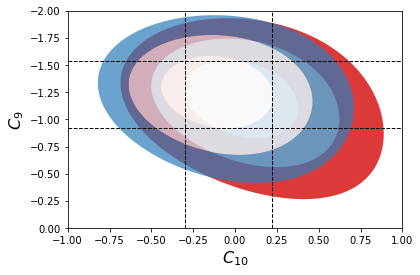

In [5]:
plt.figure()

Contour_no_power = plt.contourf(C10s,C9s,No_power_delta, levels=[2.3,6.17,11.8],cmap="Reds", extend='min', antialiased=True, alpha=.9)
Contour_power = plt.contourf(C10s,C9s,Power_delta, levels=[2.3,6.17,11.8], cmap= "Blues",extend='min', antialiased=True, alpha=.7)
plt.ylim(0,-2)



plt.ylabel(r'$C_{9}$', fontsize=16)
plt.xlabel(r'$C_{10}$', fontsize=16)
#plt.title('Global fit (no power corrections)', fontsize=14)

plt.axhline(y=low_C9, linestyle='dashed', color="black", linewidth=1)
plt.axhline(y=up_C9, linestyle='dashed', color="black", linewidth=1)

plt.axvline(x=low_C10, linestyle='dashed', color="black", linewidth=1)
plt.axvline(x=up_C10, linestyle='dashed', color="black", linewidth=1)


plt.savefig("Global_fit_comparison.png",format="png", bbox_inches="tight", dpi=300)
plt.show()